### Download the data and remove rows containing null values

In [6]:
import modules.data_module as dm
import pandas as pd

data_url = "https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv"
data_path = "data/graduates.csv"

# Used to download and save for the first time
# dm.retrieve_data(data_url, save_to_file=True, save_path="data/graduates.csv")

data = dm.retrieve_data(data_path).set_index("Unnamed: 0")
data.index.name = "ID"

data

data = data[data.Year != 1993]

# Remove Salaries.Highest or Salaries.Lowest as the Salaries.Mean and Salaries.Median are of interest.
data = data.drop(["Salaries.Lowest", "Salaries.Highest"], axis=1)

# Remove all rows where any column in the row has a value of 0
data = data[(data != 0).all(1)]

# Remove all rows where Education.Major is not: 
# "Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", "Computer Science and Math",
# "Economics", "Electrical Engineering", "Management & Administration", "Mechanical Engineering", "Other Engineering"
# "Physics and Astronomy" or "Psychology"
majors_of_interest = ["Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", 
                      "Computer Science and Math", "Economics", "Electrical Engineering", "Management & Administration", 
                      "Mechanical Engineering", "Other Engineering","Physics and Astronomy", "Psychology"]
data = data.loc[data['Education.Major'].isin(majors_of_interest)]

data

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
ID,,,,,,,,,,,,,,,,,,,,,
47,1995,1338108,Biological Sciences,54523.54,47000.0,11130,35304.27,92708,119813,1123768,...,136147,190280,361380,559199,112097,101378,515192,276259,332595,397959
48,1995,217727,Chemical Engineering,58896.72,57000.0,2653,28778.97,29745,12644,175338,...,83604,70103,57016,94190,17303,26079,28119,59804,54763,21782
49,1995,507228,Chemistry,60697.60,57000.0,6617,35623.28,49393,36562,421046,...,76773,118959,122177,212421,44322,37343,123896,112055,109206,106965
50,1995,345038,Civil Engineering,51758.63,50000.0,3273,25567.75,39586,18806,286397,...,130860,64512,109209,205473,42050,30251,66465,112177,104112,28719
51,1995,1114519,Computer Science and Math,49672.61,47000.0,8079,27110.39,87310,103423,923026,...,282449,208889,292120,426032,75539,69947,133434,226475,260939,236202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,1154661,Electrical Engineering,109173.61,100000.0,4198,80239.79,375520,155870,623271,...,490703,425903,215384,546784,115154,271693,98310,280963,238210,162343
496,2015,950566,Mechanical Engineering,98533.83,90646.0,4143,65066.19,184209,117901,648456,...,503729,420590,240458,595890,87240,254214,108836,318860,267587,157312
503,2015,1306845,Other Engineering,96287.14,90000.0,4561,73037.23,235954,228427,842463,...,484937,449263,326931,721307,128705,299484,193296,433175,334061,241025


### Plot Salaries.Mean for the majors of interest

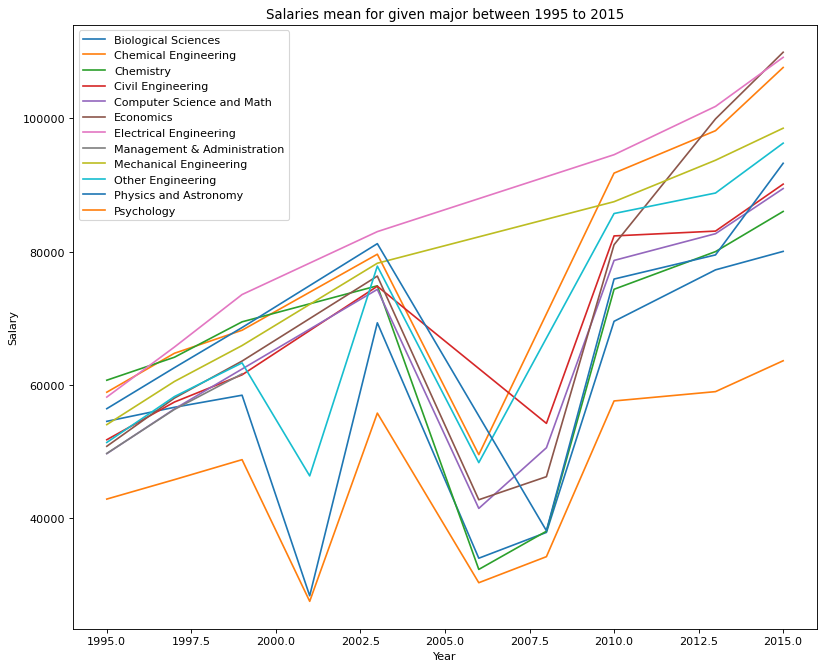

In [2]:
import matplotlib.pyplot as plt

data_salary = data[['Year','Education.Major','Salaries.Mean']]

plt.figure(figsize=(12, 10), dpi=80)

ax2.set_xticklabels(tick_labels.astype(int))
for major in majors_of_interest:
    data = data_salary.loc[data_salary['Education.Major'] == major]
    x_axis = data['Year']
    y_axis = data['Salaries.Mean']
    plt.plot(x_axis, y_axis)
    
plt.title("Salaries mean for given major between 1995 to 2015")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.legend(majors_of_interest)
plt.se
plt.show()